In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process.kernels import Matern
from sklearn.metrics import explained_variance_score as evs
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pandas as pd


from sklearn import linear_model


In [2]:
d15=np.loadtxt('d15.txt')
d16=np.loadtxt('d16.txt')
d15[:,0:1]=d15[:,0:1]/2.1
d16[:,0:1]=d16[:,0:1]/2.1
D=np.concatenate([d15,d16])
y=D[:,0]
X=D[:,1:(len(D.T)-1)]
X[:,1]=X[:,1]/100

d17=np.array(pd.read_excel('summer_2017.xlsx'))
d17[:,2]=d17[:,2]/100
Y17=d17[:,0]
X17=d17[:,1:]


In [14]:

number_splits=50
Y17_predict=np.zeros((len(Y17),number_splits))

split=np.arange(1,number_splits,1)

bins = np.arange(0,6,1)
pred_score_train=np.zeros((number_splits,len(bins)))
pred_score_test=np.zeros((number_splits,len(bins)))
GPR_score=np.zeros((number_splits,len(bins)))
svr_score=np.zeros([number_splits,])


for i in range(len(split)):    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=split[i])
    forest_reg = RandomForestRegressor() 
    forest_reg.fit(X_train,y_train)
    
    print(i)
    ########## FOR ATLANT PREDICTION #################
#     Y17_predict=np.append(Y17_predict,forest_reg.predict(X17),axis=1)
#     Y17_predict[:,i]=forest_reg.predict(X17)
#     y_pred=forest_reg.predict(X_test)
#    





   ####### FOR BINS ######### 
    inds = np.digitize(y_train, bins)
    for ct in range(len(bins)):
       
        y_bin = y_train[inds == ct+1]
        x_bin = X_train[inds == ct+1,:]
        if len(x_bin)==0:
            continue
#        
        pred_score_train[i,ct]=mean_squared_error(forest_reg.predict(x_bin), y_bin)
    
    inds = np.digitize(y_test, bins)
    for ct in range(len(bins)):
       
        y_bin = y_test[inds == ct+1]
        x_bin = X_test[inds == ct+1,:]
        if len(x_bin)==0:
            continue
#     
        pred_score_test[i,ct]=mean_squared_error(forest_reg.predict(x_bin), y_bin)

    print('train=',pred_score_train[i,:])
    print('test=',pred_score_test[i,:])





0
train= [0.00419767 0.0254647  0.1209918  0.37293968 0.01075914 0.        ]
test= [2.67540137e-02 1.80227010e-01 4.92489340e-01 2.05863833e+00
 1.29435730e+00 2.68570577e+01]
1
train= [0.00453589 0.02341728 0.08028849 0.43396947 0.12169935 3.14465064]
test= [0.03210767 0.21229418 0.49981427 3.68858135 0.32951732 0.        ]
2
train= [0.00378167 0.02642819 0.07049678 0.43745844 0.07145011 2.79541247]
test= [0.04606762 0.25726383 0.79674318 0.67387346 0.         0.        ]
3
train= [0.00423463 0.03040848 0.09953729 0.28091956 0.18118303 3.75164358]
test= [0.03483415 0.15893242 0.45668856 2.80504401 0.11004905 0.        ]
4
train= [0.00392621 0.02670616 0.07463788 0.37331055 0.10185405 0.        ]
test= [2.67961867e-02 1.85128879e-01 9.59069769e-01 5.13787634e-01
 2.22427037e-01 2.92819593e+01]
5
train= [0.00477983 0.02831534 0.07050536 0.4212168  0.07380692 3.45149426]
test= [0.03772561 0.14167102 0.61786748 1.86314835 0.94002855 0.        ]
6
train= [0.00366744 0.02514201 0.09476503 0

In [15]:
pred_score_test_mean=np.mean(pred_score_test,axis=0)
pred_score_test_mean_std=np.std(pred_score_test,axis=0)

print(pred_score_test_mean)
print(pred_score_test_mean_std)

pred_score_train_mean=np.mean(pred_score_train,axis=0)
pred_score_train_mean_std=np.std(pred_score_train,axis=0)

print(pred_score_train_mean)
print(pred_score_train_mean_std)

[ 0.02912633  0.18578782  0.6558167   2.28978164  0.57531092 11.24123113]
[6.26135643e-03 3.88115100e-02 2.24122996e-01 1.25151603e+00
 4.72259227e-01 1.32474573e+01]
[0.00420185 0.0269874  0.08958423 0.3965247  0.12234757 1.9086397 ]
[7.34563333e-04 4.41388486e-03 2.49095303e-02 1.34610589e-01
 7.41080457e-02 1.81523899e+00]


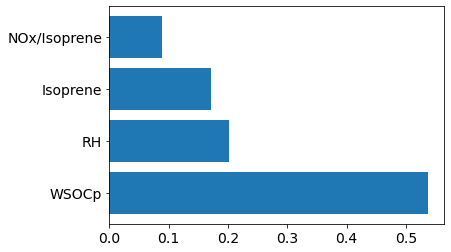

In [16]:
forest_reg.feature_importances_
barh(['WSOCp','RH','Isoprene','NOx/Isoprene'], forest_reg.feature_importances_)
yticks(fontsize=14)
xticks(fontsize=14)
savefig("feature_imp.pdf", bbox_inches='tight')

In [78]:
Y17_predict_mean=np.mean(Y17_predict,axis=1)
np.savetxt('y17.txt',Y17_predict_mean)

-0.34467368273631016

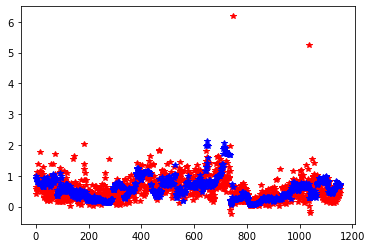

In [79]:
plot(Y17,'r*')
plot(Y17_predict_mean,'b*')
r2_score(Y17_predict_mean,Y17)

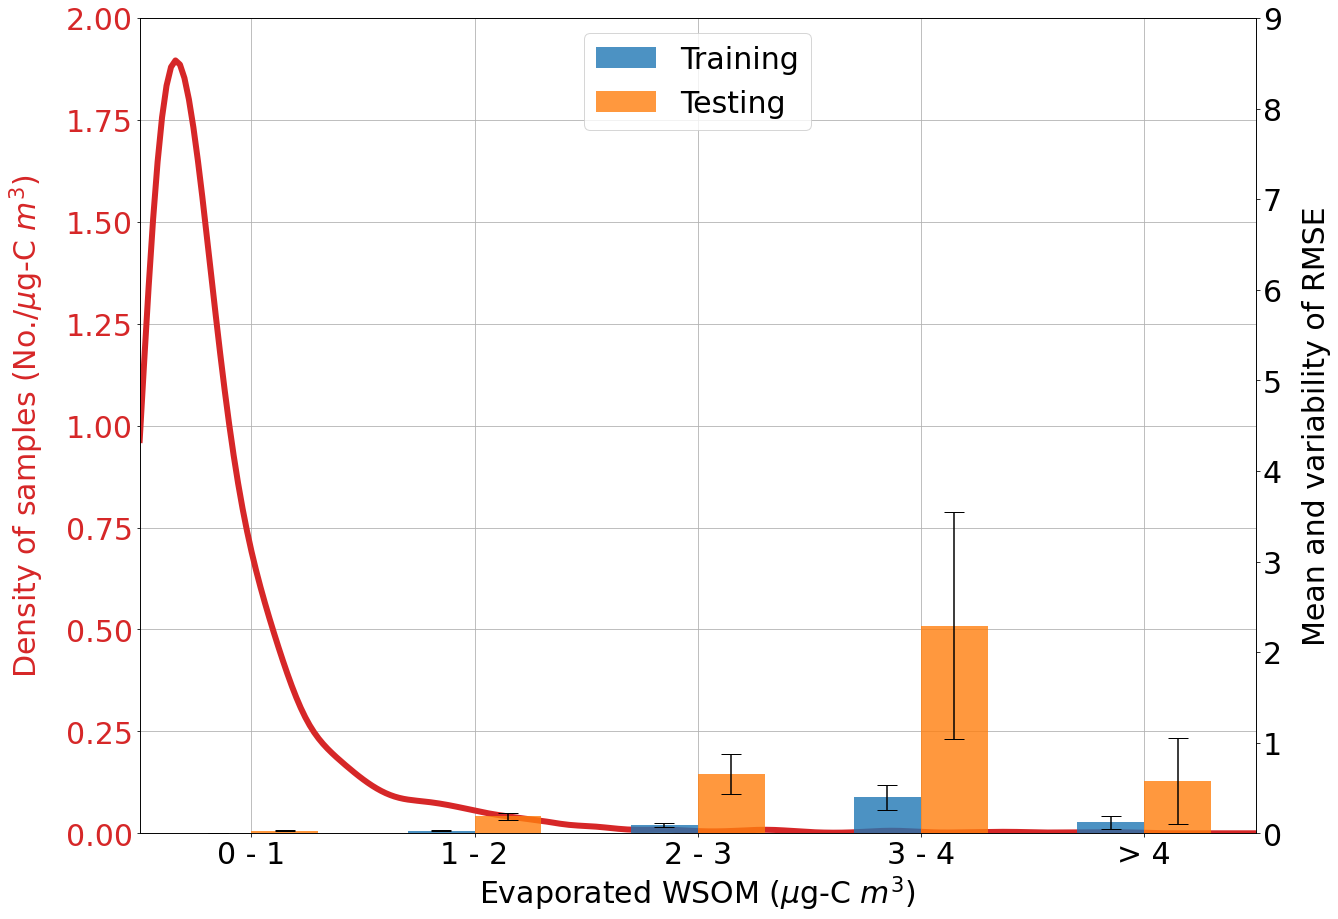

In [18]:
from scipy.stats import norm, gaussian_kde
x = np.arange(5)+0.5  # the label locations
#x = np.arange(0,12,0.5)  # the label locations

width = 0.3  # the width of the bars

fig = figure(figsize=(20,15))
ax2 = fig.add_subplot(1,1,1)

 # instantiate a second axes that shares the same x-axis
yticks(fontsize=30)
xticks(fontsize=30)
scipy_kernel = gaussian_kde(y)
u = np.linspace(0,10,500)
v = scipy_kernel.evaluate(u)
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Density of samples (No./$\mu$g-C ${m}^3$)',color = color,size = 30,labelpad=20)
# ax2.set_ylim([0,1])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax = ax2.twinx() 
rects1 = ax.bar(x - width/2, pred_score_train_mean[:-1],width, yerr=pred_score_train_mean_std[:-1],ecolor='black', capsize=10,alpha=0.8, label='Training')
rects2 = ax.bar(x + width/2, pred_score_test_mean[:-1], width, yerr=pred_score_test_mean_std[:-1],ecolor='black', capsize=10,alpha=0.8, label='Testing')
ax.set_ylabel('')
#ax.set_title('Performance analysis for 100 random splits of data',size = 30)
ax.set_xticks(x-0.5)
#ax.set_xticks(['0','0.5'])
xticks([0.5,1.5,2.5,3.5,4.5],['0 - 1','1 - 2','2 - 3','3 - 4','> 4'],fontsize=30)
yticks(fontsize=30)
ax.set_xlim([0,5])
ax.set_ylim([-0,9])
ax2.set_ylim([-0,2])
ax.legend(prop = {'size':30},loc=9)
ax2.set_xlabel('Evaporated WSOM ($\mu$g-C ${m}^3$)',size = 30)
ax2.plot(u,v,color = color,lw = 6)
ax.set_ylabel('Mean and variability of RMSE',size = 30,labelpad=20)

ax2.grid(True)
fig.savefig("Plot_ml.pdf", bbox_inches='tight')
show()



In [15]:
import pandas as pd
A=np.array(pd.read_excel('atl.xlsx'))
A[:,1]=A[:,1]/100
# # XX=create_mat(A,5)
# XX=np.append(XX,np.ones((len(XX),1)),axis=1)
y_atl=forest_reg.predict(A)
plot(y_atl,'*')
np.savetxt('y_atl.txt',y_atl)

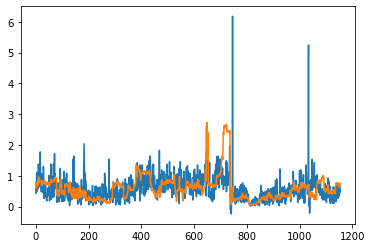

In [39]:

y_pred=forest_reg.predict(X)
plot(Y)
plot(y_pred)
#r2_score(y_pred,Y)
np.savetxt('y_2017_ML.txt',y_pred)

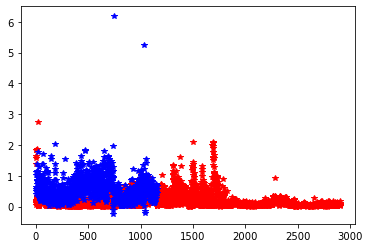

In [37]:
plot(d15[:,0]/2.1,'r*')
plot(d16[:,0]/2.1,'r*')
plot(Y,'b*')

In [6]:
# number_splits=50

# split=np.arange(1,number_splits,1)

# pred_score=np.zeros([number_splits,])
# GPR_score=np.zeros([number_splits,])
# svr_score=np.zeros([number_splits,])


# for i in range(len(split)):    
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=split[i])
#     forest_reg = RandomForestRegressor() 
#     forest_reg.fit(X_train,y_train)
#     y_pred=forest_reg.predict(X_test)
#     pred_score[i]=r2_score(y_pred, y_test)
# #     print(i,pred_score[i])
    
#     kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)+ WhiteKernel()
# #     kernel = rbf() + WhiteKernel()
#     gpr = GaussianProcessRegressor(kernel=kernel,
#         random_state=0).fit(X_train, y_train)
#     y_pred=gpr.predict(X_test)
#     GPR_score[i]=gpr.score(X_test, y_test)
    
#     if GPR_score[i]>cond_gpr:
#         var_gpr = gpr
#         cond_gpr = GPR_score[i]
#     if pred_score[i]>cond_rf:
#         var_rf = forest_reg
#         cond_rf = pred_score[i]
        
    
# #     lasso_reg = linear_model.LinearRegression()
# #     lasso_reg.fit(X_train,y_train)
# #     y_lasso=lasso_reg.predict(X_test)
# #     svr_score[i]=r2_score(y_lasso, y_test)
    
# #     print(i,pred_score[i],GPR_score[i],svr_score[i])
    
    

In [7]:
def create_mat(X_train,poly):
    #print(poly)
    
    fct=poly//(len(X_train.T)+1)
    #print(fct)
    
    X=np.zeros((len(X_train),1))
    #print(np.shape(X))
    poww=1
    ct=1
    ctt=0
    while ct<=poly:
        rem=ct%5
        poww=ct//5 +1

        #print(rem)
        if rem==0:
            X=np.append(X,np.zeros((len(X_train),3)),axis=1)
            
            X[:,ctt:ctt+4]=X_train**(poww-1)
            
            ctt=ctt+4
            if ct<poly:
                X=np.append(X,np.zeros((len(X_train),1)),axis=1)
        elif rem==1:

            #print(X)
            X[:,ctt]=X_train[:,0]**poww
        elif rem==2:
            X[:,ctt]=X_train[:,1]**poww
        elif rem==3:
            X[:,ctt]=X_train[:,2]**poww
        else:
            X[:,ctt]=X_train[:,3]**poww
        ct=ct+1
    return X
    
# poly=20
# XX=create_mat(X,poly)
# XX=np.append(XX,np.ones((len(XX),1)),axis=1)




In [8]:
X=np.array([1,2,3,4,1,2,3,4]).reshape(2,4)
create_mat(X,15)

array([[ 1.,  2.,  3.,  4.,  1.,  4.,  9., 16.,  1.,  8., 27., 64.],
       [ 1.,  2.,  3.,  4.,  1.,  4.,  9., 16.,  1.,  8., 27., 64.]])